Loading images...
Found 4222 images.
Label: 0, Image shape: (32, 32, 3)


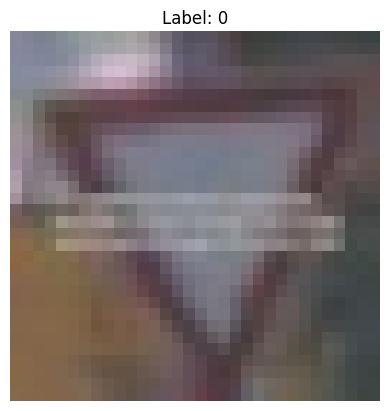

In [1]:
import numpy as np
import cv2
import os
from dataset_loading.dataset_loading import TrafficSignDataset, simple_transform  # Use relative import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
dataset = TrafficSignDataset(img_dir=r'C:\Users\delta\OneDrive\Desktop\Minor_Project_Code\CNN\Indian-Traffic Sign-Dataset\Images_custom', transform=simple_transform)


Loading images...
Found 4222 images.


In [3]:
images = []
labels = []
for i in range(len(dataset)):
    img, label = dataset.__getitem__(i)
    images.append(img)
    labels.append(label)

images = np.array(images)
labels = np.array(labels)

# Encode labels
le = LabelEncoder()
labels = le.fit_transform(labels)


In [4]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [5]:
def cnn_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(32, 32, 3)))
    # CNN layers with padding and batch normalization
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))

    # Dropout layer to prevent overfitting
    model.add(layers.Dropout(0.5))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    

    # Add the dropout after dense layer to prevent some overfitting
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(len(np.unique(labels)), activation='softmax'))  # Number of classes
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


In [6]:
model = cnn_model()
model.summary()
model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.20)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 605,983 (2.31 MB)

 Trainable params: 603,871 (2.30 MB)

 Non-trainable params: 2,112 (8.25 KB)

Epoch 1/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.0811 - loss: 4.3072 - val_accuracy: 0.0784 - val_loss: 3.6207
Epoch 2/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.1931 - loss: 3.2790 - val_accuracy: 0.1405 - val_loss: 6.3895
Epoch 3/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.2450 - loss: 2.8523 - val_accuracy: 0.3536 - val_loss: 2.1609
Epoch 4/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.2825 - loss: 2.6894 - val_accuracy: 0.4127 - val_loss: 1.9539
Epoch 5/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3180 - loss: 2.3557 - val_accuracy: 0.4112 - val_loss: 1.8986
Epoch 6/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.3556 - loss: 2.1933 - val_accuracy: 0.3757 - val_loss: 2.0691
Epoch 7/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4102 - loss: 1.9482 - val_accuracy: 0.5385 - val_loss: 1.4942
Epoch 8/100
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.4460 - loss: 1.8120 -

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [10]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# Save the model
model.save('cnn_model_custom_2.keras')


27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
Test Accuracy: 0.90


model = tf.keras.models.load_model(model_path)
input_shape = model.input_shape
print(f"Model input shape: {input_shape}")


In [11]:
import pandas as pd

# Create data dictionary for the first 10 epochs
data = {
    'Epoch': range(1, 11),
    'Accuracy': [0.1174, 0.2956, 0.4008, 0.4598, 0.5564, 0.6274, 0.6647, 0.6922, 0.7541, 0.7913],
    'Loss': [3.9373, 2.7174, 2.1798, 1.9039, 1.4427, 1.2193, 1.0747, 0.9989, 0.7774, 0.6942],
    'Val_Accuracy': [0.0459, 0.2101, 0.4275, 0.5710, 0.6109, 0.6583, 0.7618, 0.6953, 0.7811, 0.8121]
}

# Create DataFrame
df = pd.DataFrame(data)

# Format the values to 4 decimal places
df = df.round(4)

# Display the table
print("Training Results for First 10 Epochs")
display(df)

# Optionally, save to CSV for research paper
df.to_csv('training_results.csv', index=False)

Training Results for First 10 Epochs


,Epoch,Accuracy,Loss,Val_Accuracy
0,1,0.1174,3.9373,0.0459
1,2,0.2956,2.7174,0.2101
2,3,0.4008,2.1798,0.4275
3,4,0.4598,1.9039,0.5710
4,5,0.5564,1.4427,0.6109
5,6,0.6274,1.2193,0.6583
6,7,0.6647,1.0747,0.7618
7,8,0.6922,0.9989,0.6953
8,9,0.7541,0.7774,0.7811
9,10,0.7913,0.6942,0.8121
